In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
#from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

## Loading the Dataset using the inbuilt Fashion MNIST Loader

In [146]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [147]:
img_rows, img_cols = 28, 28
num_classes = 10

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


In [148]:
#del x_train, y_train, x_test, y_test
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train Shape:', x_train.shape)
print(x_train.shape[0], 'Training Samples')
print(x_test.shape[0], 'Testing Samples')
print(y_train.shape)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train Shape: (60000, 28, 28, 1)
60000 Training Samples
10000 Testing Samples
(60000,)


## CNN Architecture 

In [149]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(32, kernel_size=(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_37 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_37 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_38 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_38 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 22, 22, 64)        18496     
__________

## Early Stopping Criteria

In [150]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1)

## Part 1: No Augmentation 

In [151]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])

In [152]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 444s 7ms/step - loss: 0.3340 - acc: 0.8793 - val_loss: 0.2853 - val_acc: 0.8914
Epoch 2/10
60000/60000 [==============================] - 433s 7ms/step - loss: 0.2007 - acc: 0.9254 - val_loss: 0.2439 - val_acc: 0.9165
Epoch 3/10
60000/60000 [==============================] - 442s 7ms/step - loss: 0.1462 - acc: 0.9470 - val_loss: 0.2595 - val_acc: 0.9076
Epoch 4/10
60000/60000 [==============================] - 438s 7ms/step - loss: 0.1022 - acc: 0.9630 - val_loss: 0.3474 - val_acc: 0.8932
Epoch 5/10
60000/60000 [==============================] - 436s 7ms/step - loss: 0.0728 - acc: 0.9733 - val_loss: 0.2697 - val_acc: 0.9170
Epoch 6/10
60000/60000 [==============================] - 432s 7ms/step - loss: 0.0542 - acc: 0.9814 - val_loss: 0.2698 - val_acc: 0.9141
Epoch 7/10
60000/60000 [==============================] - 451s 8ms/step - loss: 0.0392 - acc: 0.9866 - val_loss: 0.3759 - 

In [154]:
score_train = model.evaluate(x_train, y_train, verbose=0)
print('No Augmentation Training Accuracy:', score_train[1])

score_test = model.evaluate(x_test, y_test, verbose=0)
print('No Augmentation Testing Accuracy:', score_test[1])

No Augmentation Training Accuracy: 0.9674
No Augmentation Testing Accuracy: 0.9008


In [155]:
y_pred = model.predict_classes(x_test)
y_test_class = y_test.argmax(axis=-1)
print("Classification Report (No Augmentation): \n",classification_report(y_test_class,y_pred))

Classification Report (No Augmentation): 
              precision    recall  f1-score   support

          0       0.82      0.89      0.85      1000
          1       1.00      0.96      0.98      1000
          2       0.89      0.85      0.87      1000
          3       0.95      0.86      0.90      1000
          4       0.82      0.92      0.87      1000
          5       0.85      1.00      0.92      1000
          6       0.82      0.70      0.75      1000
          7       0.98      0.90      0.94      1000
          8       0.93      0.99      0.96      1000
          9       0.97      0.94      0.96      1000

avg / total       0.90      0.90      0.90     10000



## Part 2: Vertical Flip Augmentation using Keras ImageDataGenerator

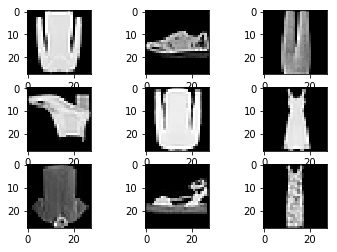

In [156]:
datagen = ImageDataGenerator(vertical_flip=True, fill_mode='nearest')

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

In [157]:
datagen_train = datagen.flow(x_train,y_train,batch_size=128)
datagen_test = datagen.flow(x_test,y_test,batch_size=128)
model.fit_generator(datagen_train,
          steps_per_epoch=60000//64,
          epochs=10,
          verbose=1,
          validation_data=datagen_test,
          validation_steps=10000//64,
          callbacks=[early_stop])

Epoch 1/10
937/937 [==============================] - 889s 948ms/step - loss: 0.1934 - acc: 0.9338 - val_loss: 0.2961 - val_acc: 0.9057
Epoch 2/10
937/937 [==============================] - 888s 948ms/step - loss: 0.0972 - acc: 0.9663 - val_loss: 0.3586 - val_acc: 0.8921
Epoch 3/10
937/937 [==============================] - 928s 990ms/step - loss: 0.0683 - acc: 0.9768 - val_loss: 0.3044 - val_acc: 0.9141
Epoch 4/10
937/937 [==============================] - 883s 942ms/step - loss: 0.0506 - acc: 0.9829 - val_loss: 0.3938 - val_acc: 0.8998
Epoch 5/10
937/937 [==============================] - 900s 960ms/step - loss: 0.0379 - acc: 0.9877 - val_loss: 0.3419 - val_acc: 0.9078
Epoch 6/10
937/937 [==============================] - 963s 1s/step - loss: 0.0313 - acc: 0.9891 - val_loss: 0.3757 - val_acc: 0.9126
Epoch 00006: early stopping


In [159]:
score_train = model.evaluate(x_train, y_train, verbose=0)
print('Vertical Flip Augmentation Training Accuracy:', score_train[1])

score_test = model.evaluate(x_test, y_test, verbose=0)
print('Vertical Flip Augmentation Testing Accuracy:', score_test[1])

Vertical Flip Augmentation Training Accuracy: 0.9914166666666666
Vertical Flip Augmentation Testing Accuracy: 0.9178


In [160]:
y_pred = model.predict_classes(x_test)


y_test_class = y_test.argmax(axis=-1)
print("Classification Report (Vertical Flip Augmentation): \n",classification_report(y_test_class,y_pred))

Classification Report (Vertical Flip Augmentation): 
              precision    recall  f1-score   support

          0       0.82      0.90      0.86      1000
          1       0.99      0.98      0.98      1000
          2       0.88      0.89      0.88      1000
          3       0.92      0.91      0.92      1000
          4       0.82      0.93      0.87      1000
          5       0.98      0.98      0.98      1000
          6       0.87      0.67      0.76      1000
          7       0.98      0.95      0.96      1000
          8       0.96      0.99      0.98      1000
          9       0.95      0.98      0.97      1000

avg / total       0.92      0.92      0.92     10000



## Part 2: Horizontal Flip Augmentation using Keras ImageDataGenerator 

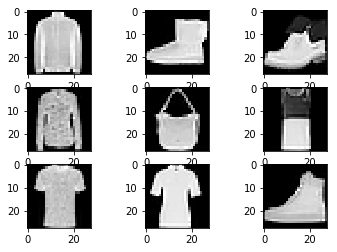

In [161]:
datagen = ImageDataGenerator(horizontal_flip=True, fill_mode='nearest')

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

In [69]:
datagen_train = datagen.flow(x_train,y_train,batch_size=64)
datagen_test = datagen.flow(x_test,y_test,batch_size=64)
model.fit_generator(datagen_train,
                    steps_per_epoch=60000//64,
                    epochs=10,
                    verbose=1,
                    validation_data=datagen_test,
                    validation_steps=10000//64)

Epoch 1/10
937/937 [==============================] - 453s 483ms/step - loss: 0.1619 - acc: 0.9453 - val_loss: 0.2734 - val_acc: 0.9123
Epoch 2/10
937/937 [==============================] - 463s 495ms/step - loss: 0.0962 - acc: 0.9675 - val_loss: 0.2290 - val_acc: 0.9261
Epoch 3/10
937/937 [==============================] - 459s 489ms/step - loss: 0.0731 - acc: 0.9748 - val_loss: 0.2408 - val_acc: 0.9240
Epoch 4/10
937/937 [==============================] - 457s 488ms/step - loss: 0.0603 - acc: 0.9790 - val_loss: 0.2694 - val_acc: 0.9251
Epoch 5/10
937/937 [==============================] - 24396s 26s/step - loss: 0.0482 - acc: 0.9838 - val_loss: 0.2575 - val_acc: 0.9222
Epoch 6/10
937/937 [==============================] - 485s 518ms/step - loss: 0.0417 - acc: 0.9857 - val_loss: 0.2935 - val_acc: 0.9265
Epoch 7/10
937/937 [==============================] - 467s 498ms/step - loss: 0.0350 - acc: 0.9879 - val_loss: 0.3109 - val_acc: 0.9238
Epoch 8/10
937/937 [============================

In [163]:
score_train = model.evaluate(x_train, y_train, verbose=0)
print('Horizontal Flip Augmentation Training Accuracy:', score_train[1])

score_test = model.evaluate(x_test, y_test, verbose=0)
print('Horizontal Flip Augmentation Testing Accuracy:', score_test[1])


Horizontal Flip Augmentation Training Accuracy: 0.9935
Horizontal Flip Augmentation Training Accuracy: 0.9279


In [72]:
y_pred = model.predict_classes(x_test)
y_test_class = y_test.argmax(axis=-1)
print("Classification Report (Horizontal Flip Augmentation): \n",classification_report(y_test_class,y_pred))

Classification Report (Horizontal Flip Augmentation): 
              precision    recall  f1-score   support

          0       0.89      0.90      0.89      1000
          1       0.99      0.99      0.99      1000
          2       0.89      0.90      0.90      1000
          3       0.92      0.95      0.93      1000
          4       0.90      0.88      0.89      1000
          5       0.99      0.99      0.99      1000
          6       0.82      0.79      0.80      1000
          7       0.97      0.97      0.97      1000
          8       0.98      0.98      0.98      1000
          9       0.97      0.97      0.97      1000

avg / total       0.93      0.93      0.93     10000

